# Stock market prediction using LSTM

In [ ]:
### Libraries
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
key='867fa8be1bc4cea2a92ace1b14cda3b5b2d43570'
df=pdr.get_data_tiingo('MSFT',api_key=key)

In [ ]:
df.to_csv('MSFT.csv')

In [5]:
df=pd.read_csv('MSFT.csv')

In [6]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2017-06-12 00:00:00+00:00,69.78,69.9400,68.13,69.250,47363986,65.342687,65.492513,63.797611,64.846390,47363986,0.0,1.0
1,MSFT,2017-06-13 00:00:00+00:00,70.65,70.8200,69.96,70.020,24815455,66.157364,66.316554,65.511241,65.567426,24815455,0.0,1.0
2,MSFT,2017-06-14 00:00:00+00:00,70.27,71.1000,69.43,70.910,25271276,65.801528,66.578749,65.014944,66.400831,25271276,0.0,1.0
3,MSFT,2017-06-15 00:00:00+00:00,69.90,70.2100,68.80,69.270,25701569,65.455057,65.745344,64.425006,64.865118,25701569,0.0,1.0
4,MSFT,2017-06-16 00:00:00+00:00,70.00,70.0252,69.22,69.730,46911637,65.548698,65.572295,64.818298,65.295867,46911637,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,MSFT,2022-06-02 00:00:00+00:00,274.58,274.6500,261.60,264.450,44008209,274.580000,274.650000,261.600000,264.450000,44008209,0.0,1.0
1254,MSFT,2022-06-03 00:00:00+00:00,270.02,273.4500,268.41,270.310,28058958,270.020000,273.450000,268.410000,270.310000,28058958,0.0,1.0
1255,MSFT,2022-06-06 00:00:00+00:00,268.75,274.1800,267.22,272.060,22400342,268.750000,274.180000,267.220000,272.060000,22400342,0.0,1.0
1256,MSFT,2022-06-07 00:00:00+00:00,272.50,273.1300,265.94,266.635,22860677,272.500000,273.130000,265.940000,266.635000,22860677,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,MSFT,2022-06-02 00:00:00+00:00,274.58,274.65,261.60,264.450,44008209,274.58,274.65,261.60,264.450,44008209,0.0,1.0
1254,MSFT,2022-06-03 00:00:00+00:00,270.02,273.45,268.41,270.310,28058958,270.02,273.45,268.41,270.310,28058958,0.0,1.0
1255,MSFT,2022-06-06 00:00:00+00:00,268.75,274.18,267.22,272.060,22400342,268.75,274.18,267.22,272.060,22400342,0.0,1.0
1256,MSFT,2022-06-07 00:00:00+00:00,272.50,273.13,265.94,266.635,22860677,272.50,273.13,265.94,266.635,22860677,0.0,1.0
1257,MSFT,2022-06-08 00:00:00+00:00,270.41,273.00,269.61,271.710,17372341,270.41,273.00,269.61,271.710,17372341,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0        69.78
1        70.65
2        70.27
3        69.90
4        70.00
         ...  
1253    274.58
1254    270.02
1255    268.75
1256    272.50
1257    270.41
Name: close, Length: 1258, dtype: float64

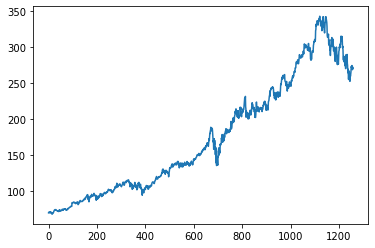

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1

array([[0.00585582],
       [0.00902015],
       [0.00763803],
       ...,
       [0.72954099],
       [0.74318033],
       [0.73557867]])

In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size, test_size

(817, 441)

In [20]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
# reshape input 
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Creating the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 248ms/step - loss: 0.0175 - val_loss: 0.0957
Epoch 2/100
12/12 [==============================] - 2s 142ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 3/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0010 - val_loss: 0.0063
Epoch 4/100
12/12 [==============================] - 2s 140ms/step - loss: 6.4811e-04 - val_loss: 0.0027
Epoch 5/100
12/12 [==============================] - 2s 145ms/step - loss: 5.4918e-04 - val_loss: 0.0020
Epoch 6/100
12/12 [==============================] - 2s 141ms/step - loss: 4.8292e-04 - val_loss: 0.0022
Epoch 7/100
12/12 [==============================] - 2s 143ms/step - loss: 4.8076e-04 - val_loss: 0.0020
Epoch 8/100
12/12 [==============================] - 2s 139ms/step - loss: 4.5681e-04 - val_loss: 0.0019
Epoch 9/100
12/12 [==============================] - 2s 129ms/step - loss: 4.5840e-04 - val_loss: 0.0019
Epoch 10/100
12/12 [==============================] - 2s 129ms/step

12/12 [==============================] - 2s 141ms/step - loss: 2.1868e-04 - val_loss: 0.0013
Epoch 79/100
12/12 [==============================] - 2s 140ms/step - loss: 2.2848e-04 - val_loss: 0.0022
Epoch 80/100
12/12 [==============================] - 2s 140ms/step - loss: 2.3184e-04 - val_loss: 0.0013
Epoch 81/100
12/12 [==============================] - 2s 137ms/step - loss: 2.1496e-04 - val_loss: 0.0030
Epoch 82/100
12/12 [==============================] - 2s 139ms/step - loss: 2.1370e-04 - val_loss: 0.0017
Epoch 83/100
12/12 [==============================] - 2s 141ms/step - loss: 2.1168e-04 - val_loss: 0.0014
Epoch 84/100
12/12 [==============================] - 2s 138ms/step - loss: 2.0549e-04 - val_loss: 0.0023
Epoch 85/100
12/12 [==============================] - 2s 141ms/step - loss: 2.4679e-04 - val_loss: 0.0013
Epoch 86/100
12/12 [==============================] - 2s 137ms/step - loss: 2.0817e-04 - val_loss: 0.0017
Epoch 87/100
12/12 [==============================] - 2s 13

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
rain_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.014727269364786825

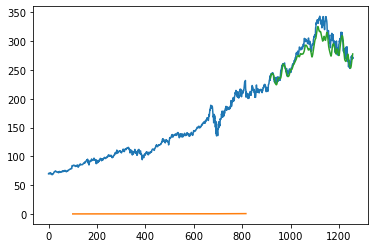

In [31]:
### Plotting 
# shift train predictions for plotting
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
len(test_data)

441

In [26]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6382222]
101
1 day input [0.98621517 0.9753037  0.96959337 0.94871608 0.90277879 0.8936859
 0.89426784 0.89510439 0.89768677 0.90965302 0.86066051 0.88030116
 0.85284062 0.85531389 0.8490216  0.82876264 0.82999927 0.80133847
 0.83123591 0.84262021 0.87324507 0.88313814 0.87506365 0.89215829
 0.8477486  0.86480687 0.84665745 0.85978759 0.88397469 0.85185859
 0.82516185 0.82501637 0.84491162 0.84138357 0.80948571 0.79930167
 0.79853786 0.77144104 0.82352513 0.8334182  0.83880119 0.82483451
 0.84389321 0.82836255 0.80632138 0.76649451 0.75536481 0.80137485
 0.79079072 0.77071361 0.75751073 0.79646468 0.8227977  0.82581654
 0.84476613 0.84014694 0.85796901 0.8413472  0.8581145  0.85658689
 0.88211974 0.89925075 0.89361315 0.87342693 0.87746417 0.8976504
 0.88277442 0.84138357 0.84818506 0.83218157 0.78959046 0.77795155
 0.79817415 0.76984069 0.77235033 0.78973594 0.79359133 0.77340511
 0.74874518 0.77307776 0.73488761 0.78217066 0.80548483 0.76143886
 0.7867171  0.77693315 0.80675784 0.

10 day output [[0.53298676]]
11 day input [0.86066051 0.88030116 0.85284062 0.85531389 0.8490216  0.82876264
 0.82999927 0.80133847 0.83123591 0.84262021 0.87324507 0.88313814
 0.87506365 0.89215829 0.8477486  0.86480687 0.84665745 0.85978759
 0.88397469 0.85185859 0.82516185 0.82501637 0.84491162 0.84138357
 0.80948571 0.79930167 0.79853786 0.77144104 0.82352513 0.8334182
 0.83880119 0.82483451 0.84389321 0.82836255 0.80632138 0.76649451
 0.75536481 0.80137485 0.79079072 0.77071361 0.75751073 0.79646468
 0.8227977  0.82581654 0.84476613 0.84014694 0.85796901 0.8413472
 0.8581145  0.85658689 0.88211974 0.89925075 0.89361315 0.87342693
 0.87746417 0.8976504  0.88277442 0.84138357 0.84818506 0.83218157
 0.78959046 0.77795155 0.79817415 0.76984069 0.77235033 0.78973594
 0.79359133 0.77340511 0.74874518 0.77307776 0.73488761 0.78217066
 0.80548483 0.76143886 0.7867171  0.77693315 0.80675784 0.76082054
 0.75129119 0.71437405 0.73226886 0.6997163  0.68080308 0.70178948
 0.7031716  0.72252128

20 day output [[0.4733002]]
21 day input [0.87324507 0.88313814 0.87506365 0.89215829 0.8477486  0.86480687
 0.84665745 0.85978759 0.88397469 0.85185859 0.82516185 0.82501637
 0.84491162 0.84138357 0.80948571 0.79930167 0.79853786 0.77144104
 0.82352513 0.8334182  0.83880119 0.82483451 0.84389321 0.82836255
 0.80632138 0.76649451 0.75536481 0.80137485 0.79079072 0.77071361
 0.75751073 0.79646468 0.8227977  0.82581654 0.84476613 0.84014694
 0.85796901 0.8413472  0.8581145  0.85658689 0.88211974 0.89925075
 0.89361315 0.87342693 0.87746417 0.8976504  0.88277442 0.84138357
 0.84818506 0.83218157 0.78959046 0.77795155 0.79817415 0.76984069
 0.77235033 0.78973594 0.79359133 0.77340511 0.74874518 0.77307776
 0.73488761 0.78217066 0.80548483 0.76143886 0.7867171  0.77693315
 0.80675784 0.76082054 0.75129119 0.71437405 0.73226886 0.6997163
 0.68080308 0.70178948 0.7031716  0.72252128 0.67618389 0.67276497
 0.67065542 0.63822222 0.63092482 0.62195116 0.61163789 0.60046685
 0.58886904 0.57716835

In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
len(df1)

1259

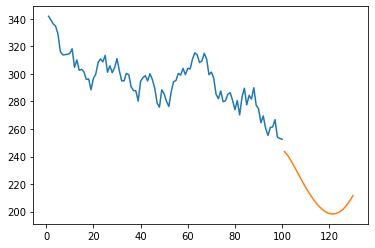

In [31]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

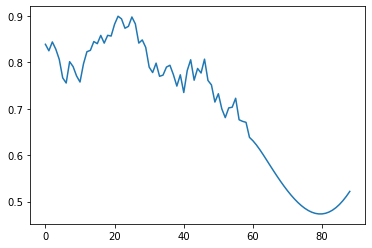

In [32]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [33]:
df3=scaler.inverse_transform(df3).tolist()

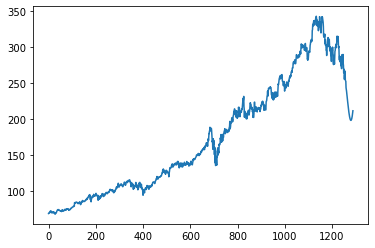

In [34]:
plt.plot(df3)